# Formatting and analysing a DEM

## Manipulate the DEM

This is a brief tutorial that shows how to format and then plot a tiff that you downloaded from the internet. It serves as an alternative to looking at a DEM in a GIS. 

First, you need to import some of our tools.

In [1]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
from lsdviztools.lsdplottingtools import lsdmap_basicmanipulation as lsdm_bm
import lsdviztools.lsdmapwrappers as lsdmw

Now, point the tool to the data. Here we downloaded some data from the Scottish goverment lidar portal. You should download your own DEM and replace the filename. 

First we convert to UTM. 

In [ ]:
RasterFile = "NT65NE_50CM_DTM_PHASE3.tif"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
gio.convert2UTM(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=3)

Now convert the file to bil format (for LSDTopoTools)

In [ ]:
newRasterFile = "NT65NE_50CM_DTM_PHASE3_UTM.tif"
gio.convert2bil(DataDirectory, newRasterFile,minimum_elevation=0)

You can also convert for LSDTopoTools directly (this lumps the previous two steps together):

In [ ]:
RasterFile = "NT66SE_50CM_DTM_PHASE3.tif"
gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=3)

## Run an lsdtopotools analysis to get some new information

Now get some derivative rasters using lsdtopotools

In [ ]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "7",
                    "print_curvature" : "true",
                    "print_dinf_drainage_area_raster" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "NT66SE_50CM_DTM_PHASE3_UTM",
                                 write_prefix= "NT66SE_50CM_DTM_PHASE3_UTM",
                                 read_path = "/LSDTopoTools/data/lammermuir/",
                                 write_path = "/LSDTopoTools/data/lammermuir/",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

In [ ]:
lsdtt_drive.run_lsdtt_command_line_tool()

## Lets plot some data

Your colourbar will be located: right
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
minimum values are x: 527468.0 and y: 6187462.0
I made the ticks.
x labels are: 
['528', '529', '530', '531', '532']
x locations are:
[528000.0, 529000.0, 530000.0, 531000.0, 532000.0]
y labels are: 
['6188', '6189', '6190', '6191', '6192']
y locations are:
[6188000.0, 6189000.0, 6190000.0, 6191000.0, 6192000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection str

<Figure size 432x288 with 0 Axes>

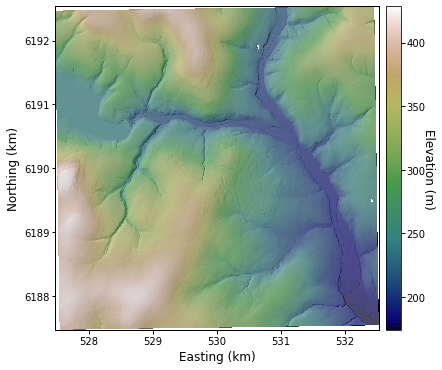

In [29]:
%matplotlib inline
Base_file = "NT66SE_50CM_DTM_PHASE3_UTM"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology")

Now lest plot the curvature data

Your colourbar will be located: right
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
minimum values are x: 527468.0 and y: 6187462.0
I made the ticks.
x labels are: 
['528', '529', '530', '531', '532']
x locations are:
[528000.0, 529000.0, 530000.0, 531000.0, 532000.0]
y labels are: 
['6188', '6189', '6190', '6191', '6192']
y locations are:
[6188000.0, 6189000.0, 6190000.0, 6191000.0, 6192000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection str

<Figure size 432x288 with 0 Axes>

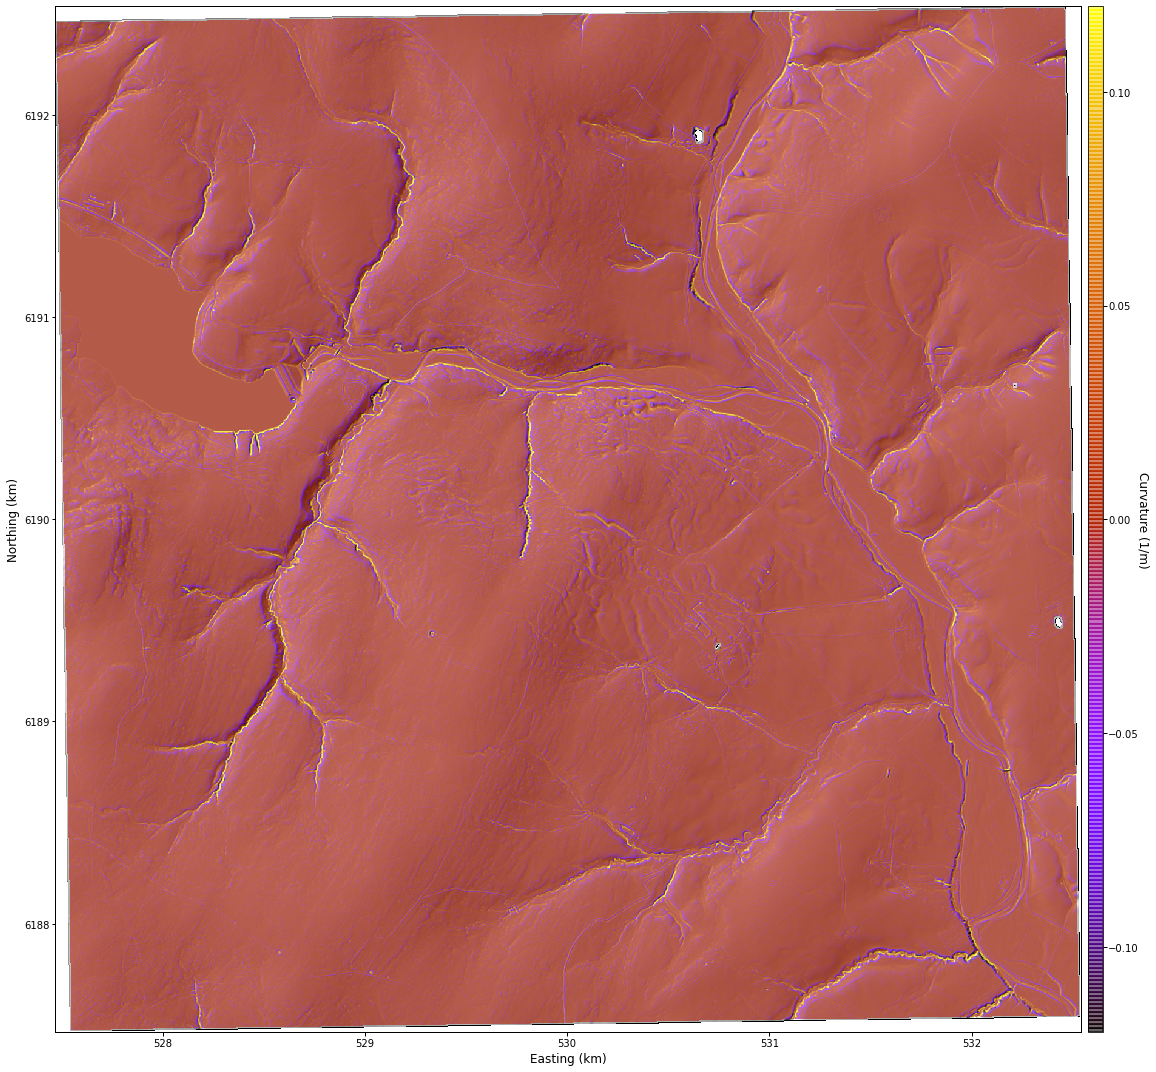

In [34]:
Base_file = "NT66SE_50CM_DTM_PHASE3_UTM"
Drape_prefix = "NT66SE_50CM_DTM_PHASE3_UTM_CURV"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "gnuplot", cbar_loc = "right", 
                              cbar_label = "Curvature (1/m)",
                              save_fig=False, size_format="big",
                              colour_min_max = [-0.12,0.12])